<a href="https://colab.research.google.com/github/albertochumpitazi/Master_VIU_AlbertoChumpitazi/blob/main/02_Procesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>  <center>
## <center> Universidad Internacional de Valencia (VIU) <center>
## <center> Trabajo Fin de Master (TFM) <center>


---


# <center> **Extracción de patrones de comportamiento de consumo de energía de los hogares en una red inteligente** <center>


---



**Titulación:** Máster en Big Data y Data Science

**Alumno:** Alberto Sergio Chumpitazi Llave

**Director:** Jose Carlos González, PhD.

#4.2. Procesado

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

cTotal = ['Total Consumo']
cTemp = ['Temp']
cArtefactos1 = ['Dish washer', 'Washing Machine', 'Dryer']
cArtefactos2 = ['Water heater', 'TV', 'Microwave' ]
cArtefactos3 = ['Kettle','Lighting','Refrigerator']
cArtefactos = cArtefactos1 + cArtefactos2 + cArtefactos3
cArtefactosTemp  = cArtefactos  + cTemp

ruta_excel = '/content/drive/MyDrive/VIU/14MBID/Data/02_Caracteristicas_seleccionadas.csv'
df_base_temp = pd.read_csv(ruta_excel, sep=",")
df_base_temp['fecha'] = pd.to_datetime(df_base_temp['fecha'])
df_base_temp.insert(1, 'total_valida', df_base_temp[cArtefactos].sum(axis=1))

In [4]:
df_base_temp = df_base_temp[df_base_temp['total_valida']!=0]


In [5]:
df_base_temp[df_base_temp['total_valida']==0]

,fecha,total_valida,hora,Consumidor,Dish washer,Washing Machine,Dryer,Water heater,TV,Microwave,Kettle,Lighting,Refrigerator,Temp,Producer,Is_producer


In [6]:
df_base_temp.drop(columns=['total_valida'], inplace=True)

In [7]:
from IPython.display import display
df_tipos_datos  = df_base_temp.dtypes
df_nulos = df_base_temp.isnull().any()

# Crear un DataFrame con la información recopilada
df_info = pd.DataFrame({
    'Tipo de Dato': df_tipos_datos,
    'Valores Nulos': df_nulos
})
display(df_info)

,Tipo de Dato,Valores Nulos
fecha,datetime64[ns],False
hora,int64,False
Consumidor,object,False
Dish washer,float64,False
Washing Machine,float64,False
Dryer,float64,False
Water heater,float64,False
TV,float64,False
Microwave,float64,False
Kettle,float64,False


In [8]:
def mostrar_estadisticas(df, columnas):
  Cols = {
    'Variable': [],
    'count': [],
    'mean': [],
    'std': [],
    'min': [],
    '25%': [],
    '50%': [],
    '75%': [],
    'max': []
  }

  df_Estad = pd.DataFrame(Cols)

  for columna in columnas :
    #TotalReg = len(df_base_temp[df_base_temp[columna]!=0][columna])
    TotalReg = len(df[columna])
    mean = df[df[columna]!=0][columna].mean()
    std = df[df[columna]!=0][columna].std()
    min = df[df[columna]!=0][columna].min()
    _25 = df[df[columna]!=0][columna].quantile(0.25)
    _50 = df[df[columna]!=0][columna].quantile(0.50)
    _75 = df[df[columna]!=0][columna].quantile(0.75)
    max = df[df[columna]!=0][columna].max()
    dif =   _75 / max

    nuevo_registro = pd.DataFrame({'Variable': [columna],'count':[TotalReg],'mean':[mean] ,'std':[std],'min':[min],'25%':[_25] ,'50%':[_50] , '75%': [_75], 'max': [max] })
    df_Estad = pd.concat([df_Estad, nuevo_registro])
  df_Estad = df_Estad.fillna(0)
  return df_Estad

In [9]:
mostrar_estadisticas(df_base_temp,cArtefactosTemp)

,Variable,count,mean,std,min,25%,50%,75%,max
0,Dish washer,355870.0,1.639046,1.273064,0.000104,0.736837,1.511125,2.214587,8.395277
0,Washing Machine,355870.0,1.213512,1.125176,0.000137,0.232891,1.124566,1.864769,7.271107
0,Dryer,355870.0,1.777028,1.288048,0.002450,0.950594,1.702337,2.248300,13.000000
0,Water heater,355870.0,0.960461,0.731431,0.059000,0.469000,0.879000,1.279000,4.205000
0,TV,355870.0,0.224250,0.170263,0.001536,0.092846,0.176714,0.297650,1.017830
0,Microwave,355870.0,1.277426,0.371382,0.974000,1.083562,1.177460,1.266113,3.348000
0,Kettle,355870.0,2.327163,0.382985,1.859667,1.921000,2.220000,2.724869,3.072000
0,Lighting,355870.0,0.668902,0.338560,0.005000,0.342000,0.724000,0.881000,1.759333
0,Refrigerator,355870.0,0.187054,0.071121,0.070000,0.140000,0.140000,0.280000,0.420000
0,Temp,355870.0,10.142263,7.800944,-10.000000,4.000000,9.000000,16.000000,32.000000


In [10]:
from sklearn import preprocessing

def corrige_outlier(df, columnas):
  df_base = df.copy()
  df_oul = df.copy()
  df_oul = df_oul.reset_index()
  for columna in columnas :
    df_oul_col = df_oul[df_oul[columna] != 0][columna]
    #for Itera in range(1):
    Q1 = df_oul_col.quantile(0.25)
    Q3 = df_oul_col.quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    df_oul_col = pd.DataFrame(df_oul_col)
    df_base[columna] = df_base[columna].apply(lambda x: lim_sup if x > lim_sup else (lim_inf if 0 < x < lim_inf else x))
  return df_base

def normalizar(df, columnas, tipoNorm ):
  dftmp = df.copy()
  for columna in columnas:
    df_filtrado = dftmp[dftmp[columna] != 0]
    if (tipoNorm == "MinMaxScaler"):
      dfNorm = preprocessing.MinMaxScaler().fit_transform(df_filtrado[[columna]])
      dftmp.loc[dftmp[columna] != 0, columna] = dfNorm
    if (tipoNorm == "Normalizer"):
      dfNorm = preprocessing.Normalizer().fit_transform(df_filtrado[[columna]])
      dftmp.loc[dftmp[columna] != 0, columna] = dfNorm
    if (tipoNorm == "StandardScaler"):
      dfNorm = preprocessing.StandardScaler().fit_transform(df_filtrado[[columna]])
      dftmp.loc[dftmp[columna] != 0, columna] = dfNorm
    if (tipoNorm == "RobustScaler"):
      dfNorm = preprocessing.RobustScaler().fit_transform(df_filtrado[[columna]])
      dftmp.loc[dftmp[columna] != 0, columna] = dfNorm
  return dftmp

In [11]:
df_oulayer = df_base_temp.copy()
df_sin_oulayer  = corrige_outlier(df_base_temp, cArtefactosTemp)

In [12]:
mostrar_estadisticas(df_sin_oulayer,cArtefactosTemp)

,Variable,count,mean,std,min,25%,50%,75%,max
0,Dish washer,355870.0,1.610732,1.184783,0.000104,0.736837,1.511125,2.214587,4.431213
0,Washing Machine,355870.0,1.197434,1.068700,0.000137,0.232891,1.124566,1.864769,4.312585
0,Dryer,355870.0,1.720615,1.114524,0.002450,0.950594,1.702337,2.248300,4.194859
0,Water heater,355870.0,0.920740,0.597759,0.059000,0.469000,0.879000,1.279000,2.494000
0,TV,355870.0,0.220246,0.158642,0.001536,0.092846,0.176714,0.297650,0.604856
0,Microwave,355870.0,1.209923,0.189104,0.974000,1.083562,1.177460,1.266113,1.539940
0,Kettle,355870.0,2.327163,0.382985,1.859667,1.921000,2.220000,2.724869,3.072000
0,Lighting,355870.0,0.668659,0.337803,0.005000,0.342000,0.724000,0.881000,1.689500
0,Refrigerator,355870.0,0.187054,0.071121,0.070000,0.140000,0.140000,0.280000,0.420000
0,Temp,355870.0,10.142263,7.800944,-10.000000,4.000000,9.000000,16.000000,32.000000


Text(0, 0.5, 'Consumo Kwh')

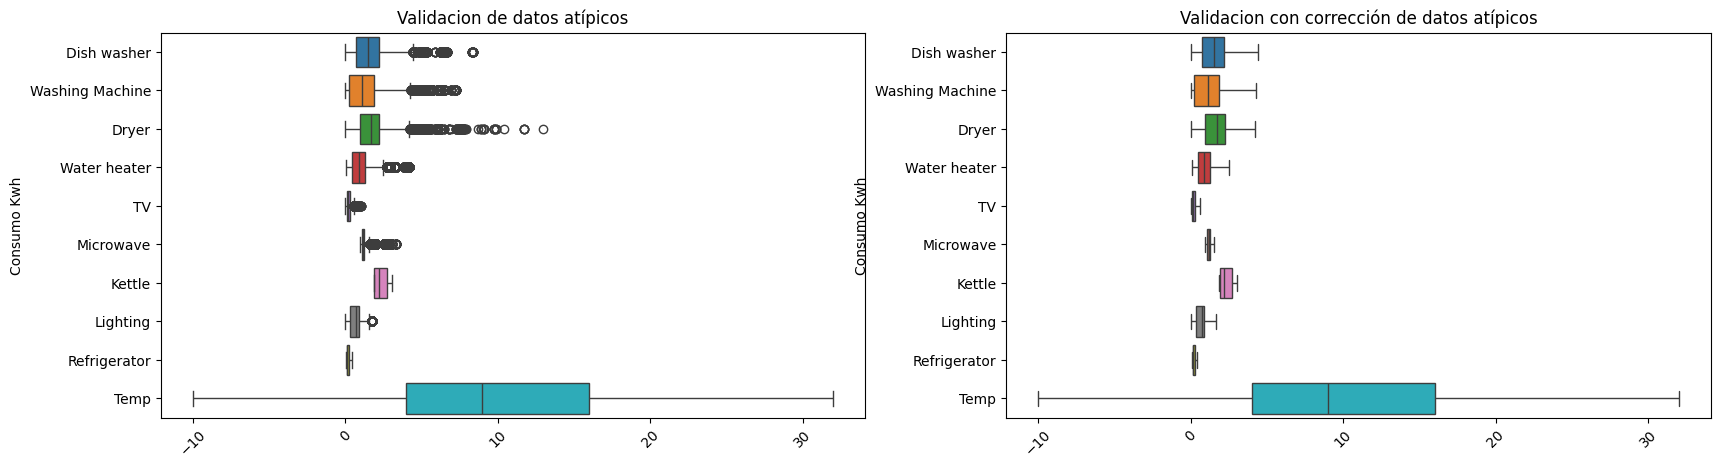

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
axes = []
vpostPlot=0
plargo = 5
pancho = 20

axes.append(plt.subplots)

fig1, axes[vpostPlot] = plt.subplots(1,2, figsize=(pancho,plargo))

df_out = []
#df_no_zeros = df_oulayer.copy()
#cvar = cArtefactos1 + cArtefactos2 + cArtefactos3

for columna in cArtefactosTemp:
  df_out_a = df_oulayer[df_oulayer[columna] != 0][columna]
  df_out_a.reset_index(drop=True, inplace=True)
  df_out.append(df_out_a)

axplt = axes[0][0]
sns.boxplot(ax=axplt, data=df_out, orient="h")
axplt.xaxis.set_tick_params(rotation=45)
sns.set_style("whitegrid")
axplt.set_title('Validacion de datos atípicos')
axplt.set_ylabel('Consumo Kwh')

#df_no_zeros  = outlier(df_no_zeros, cvar)
#df_consumidor = df_no_zeros
for columna in cArtefactosTemp:
  df_out_a = df_sin_oulayer[df_sin_oulayer[columna] != 0][columna]
  df_out_a.reset_index(drop=True, inplace=True)
  df_out.append(df_out_a)

axplt = axes[0][1]
sns.boxplot(ax=axplt, data=df_out, orient="h")
axplt.xaxis.set_tick_params(rotation=45)
sns.set_style("whitegrid")
axplt.set_title('Validacion con corrección de datos atípicos')
axplt.set_ylabel('Consumo Kwh')

In [14]:
df_procesado = df_sin_oulayer.copy()

In [16]:
from google.colab import files
df_procesado.to_csv('02_Procesado.csv', header=True, index=False)
files.download('02_Procesado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>